In [2]:
import sqlite3 as sql
import pandas 

con = sql.connect("scienedirect.db")
cursor = con.cursor()

cursor.execute("SELECT * FROM ArtikelContent") 
rows = cursor.fetchall()

koalas = pandas.DataFrame(rows)
title = koalas.iloc[:,0]
abstract = koalas.iloc[:,1]
abstract2 = koalas.iloc[:,2]
introduction = koalas.iloc[:,3]
snippets = koalas.iloc[:,4]
longText = koalas.iloc[:,5]
author = koalas.iloc[:,6]

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Kelimeler arası ilişkileri tanımlayın (örneğin, bigramlar)
edges = [("kelime1", "kelime2"), ("kelime2", "kelime3"),  ("kelime2", "kelime4")]

# Ağ oluşturun
G = nx.Graph()
G.add_edges_from(edges)

# Ağı görselleştirin
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=5000)
plt.show()


In [ ]:
weighted_edges = [("kelime1", "kelime3", 5), ("kelime2", "kelime3", 5), ("kelime3", "kelime4", 1), ("kelime5","kelime1",8) ]

G = nx.Graph()
G.add_weighted_edges_from(weighted_edges)

plt.figure(figsize=(13, 5))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=5000)
plt.show()


Bağlantılı olacak kelimeri görmek için kullanılabilir, fakat biraz bok gibi yöntem

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

# Örnek: "good" kelimesinin eşanlamlılarını alın
synonyms = []
for syn in wordnet.synsets('good'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())

print(set(synonyms))

ard arda gelen kelimerin arasın bağlantı oluşturma fonksiyonu

In [ ]:
import nltk
from nltk.util import bigrams
from collections import Counter

metin = "Bu metin analizi bağlamında, bağlantılı kelimeleri analiz etmek istiyoruz."
kelimeler = metin.split()
bigramlar = list(bigrams(kelimeler))

# Bigram sıklıklarını say
bigram_freq = Counter(bigramlar)
print(bigram_freq.most_common(5))  # En yaygın 5 bigram


from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('turkish'))
kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]

print(stop_words)


!---------Kelime Ağacı Oluşturma--------------!

In [ ]:
import re
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords



# 1️⃣ Metin verisi (örneğin, tez metni)
text = """Bu metin analizi örneği, bağlantılı kelimeleri analiz etmek için kullanılan bir tez içeriğidir. 
Metin ağları, kelimeler arasındaki ilişkileri görselleştirmek için sıklıkla kullanılır. 
Özellikle metin madenciliği, büyük veri ve doğal dil işleme (NLP) alanlarında kelimeler arasındaki bağlantılar önemlidir."""

# 2️⃣ Veri ön işleme (küçük harf, noktalama temizleme,stopword çıkartma)
def preprocess_text(text):
    # Noktalama işaretlerini kaldır ve tüm kelimeleri küçük harfe dönüştür
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    text = text.lower()  # Küçük harfe dönüştür
    return text    

clean_text = preprocess_text(text)

# 3️⃣ Stop kelimeri kaldırır
def remove_stopwords(kelimeler):   
    nltk.download('stopwords') 
    stop_words = set(stopwords.words('turkish'))#Hangi dil için kullanılacaksa...
    kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]
    return kelimeler

kelimeler = clean_text.split()
#kelimeler = remove_stopwords(kelimeler)


# 4️⃣ Bigram (iki kelimenin bağlantısını) oluşturma
bigrams = list(nltk.bigrams(kelimeler))

# 5️⃣ Bağlantı sıklıklarını say
bigram_freq = Counter(bigrams)
print("En sık geçen kelime bağlantıları:", bigram_freq.most_common(10))

# 6️⃣ Kelime ağı oluşturma
G = nx.Graph()

# Ağı oluştur (sıklık değeri edge ağırlığı olarak atanır)
for bigram, freq in bigram_freq.items():
    G.add_edge(bigram[0], bigram[1], weight=freq)

# 7️⃣ Ağı görselleştirme
plt.figure(figsize=(12, 8))

# Ağı çiz, kenar kalınlığı edge ağırlığına göre ayarlanır
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]  # Ağırlık değerleri

# Ağı çizdir
pos = nx.spring_layout(G, seed=42)  # Konum düzenlemesi
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_color='lightblue', 
    font_weight='bold', 
    node_size=3000, 
    width=[0.1 * w for w in weights]  # Kenar kalınlığını ağırlığa göre ayarla
)

plt.title('Metin Ağı: Bağlantılı Kelimeler')
plt.show()


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('turkish'))

kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]

print(kelimeler)


In [ ]:
import re
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

 



# 1️⃣ Metin verisi (örneğin, tez metni)
text = """Bu metin analizi örneği, bağlantılı kelimeleri analiz etmek için kullanılan bir tez içeriğidir. 
Metin ağları, kelimeler arasındaki ilişkileri görselleştirmek için sıklıkla kullanılır. 
Özellikle metin madenciliği, büyük veri ve doğal dil işleme (NLP) alanlarında kelimeler arasındaki bağlantılar önemlidir."""

# 2️⃣ Veri ön işleme (küçük harf, noktalama temizleme,stopword çıkartma)
def preprocess_text(text):
    # Noktalama işaretlerini kaldır ve tüm kelimeleri küçük harfe dönüştür
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    text = text.lower()  # Küçük harfe dönüştür
    return text    

clean_text = preprocess_text(text)

kelimeler = clean_text.split()

# 4️⃣ Bigram (iki kelimenin bağlantısını) oluşturma
bigrams = list(nltk.bigrams(kelimeler))

# 5️⃣ Bağlantı sıklıklarını say
bigram_freq = Counter(bigrams)
print("En sık geçen kelime bağlantıları:", bigram_freq.most_common(10))

# 6️⃣ Kelime ağı oluşturma
G = nx.Graph()
print(G.degree())

# Ağı oluştur (sıklık değeri edge ağırlığı olarak atanır)
for bigram, freq in bigram_freq.items():
    G.add_edge(bigram[0], bigram[1], weight=freq)

# 7️⃣ Ağı görselleştirme
plt.figure(figsize=(12, 8))

# Ağı çiz, kenar kalınlığı edge ağırlığına göre ayarlanır
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]  # Ağırlık değerleri

# Ağı çizdir
pos = nx.spring_layout(G, seed=42)  # Konum düzenlemesi

print(G.degree())
filtered_nodes = [node for node, degree in G.degree() if degree > 3]
subgraph = G.subgraph(filtered_nodes)

nx.draw(
    subgraph, 
    pos, 
    with_labels=True, 
    node_color='lightblue', 
    font_weight='bold', 
    node_size=3000, 
    width=[0.1 * w for w in weights]  # Kenar kalınlığını ağırlığa göre ayarla
)

plt.title('Metin Ağı: Bağlantılı Kelimeler')
plt.show()


In [ ]:
import re
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords



bigrams = list(nltk.bigrams(text))
bigram_freq = Counter(bigrams)
print("En sık geçen kelime bağlantıları:", bigram_freq.most_common(10))

G = nx.Graph()

for bigram, freq in bigram_freq.items():
    G.add_edge(bigram[0], bigram[1], weight=freq)
plt.figure(figsize=(12, 8))
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]  # Ağırlık değerleri

pos = nx.spring_layout(G, seed=42)  # Konum düzenlemesi
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_color='lightblue', 
    font_weight='bold', 
    node_size=3000, 
    width=[0.1 * w for w in weights]  # Kenar kalınlığını ağırlığa göre ayarla
)

plt.title('Metin Ağı: Bağlantılı Kelimeler')
plt.show()


In [ ]:

import nltk
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Örnek bigram listesi oluştur
bigrams = list(nltk.bigrams(text))  # 'text' değişkeniniz burada olmalı
bigram_freq = Counter(bigrams)
print(bigram_freq)
  
# En büyük 50 bağlantıyı seç
top_50_bigrams = Counter(dict(bigram_freq.most_common(5000)))

# Grafik oluşturma
G = nx.Graph()

# Sadece top_50_bigrams içindeki bigramları ekle
for bigram, freq in top_50_bigrams.items():
    G.add_edge(bigram[0], bigram[1], weight=freq)

# Grafiği görselleştir
plt.figure(figsize=(12, 8))
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]  # Ağırlık değerleri

pos = nx.spring_layout(G, seed=42)  # Konum düzenlemesi
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_color='lightblue', 
    font_weight='bold', 
    node_size=150, 
    width=[0.1 * w for w in weights]  # Kenar kalınlığını ağırlığa göre ayarla
)

plt.title('Metin Ağı: En Büyük 50 Bağlantılı Kelimeler')
plt.show()


In [60]:
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    text = text.lower().split()  # Küçük harfe dönüştür
    return text    

def remove_stopwords(kelimeler):   
    stop_words = set(stopwords.words('english'))#Hangi dil için kullanılacaksa...
    kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]
    return kelimeler

text = preprocess_text('\n'.join(title))
text = remove_stopwords(text)
text

['silver',
 'loaded',
 'functionalized',
 'calix',
 '4arene',
 'nanofibers',
 'evaluation',
 'burn',
 'wound',
 'healing',
 'clinicalprostate',
 'cancernavigating',
 'gray',
 'zone',
 'machine',
 'learning',
 'differentiate',
 'malignancy',
 'pirads',
 '3',
 'lesions',
 'research',
 'articleeffect',
 'kangaroo',
 'mother',
 'care',
 'cerebral',
 'oxygenation',
 'physiological',
 'parameters',
 'comfort',
 'levels',
 'latepremature',
 'infants',
 'randomized',
 'controlled',
 'trial',
 'image',
 'forgery',
 'detection',
 'combining',
 'visual',
 'transformer',
 'variational',
 'autoencoder',
 'network',
 'encapsulation',
 'diuron',
 'znbased',
 'magnetic',
 'metalorganic',
 'framework',
 'reduction',
 'mobility',
 'soil',
 'frequency',
 'longterm',
 'nonsteroidal',
 'antiinflammatory',
 'drug',
 'hypersensitivity',
 'nasal',
 'polypectomy',
 'childhood',
 'short',
 'communicationa',
 'feasible',
 '3d',
 'printed',
 'electrode',
 'modified',
 'zno',
 'nanoparticles',
 'detection',
 'dopa

In [61]:
bigrams = list(nltk.bigrams(text))
bigram_freq = Counter(bigrams)
bigram_freq

Counter({('enzyme', 'inhibitory'): 45,
         ('full', 'length'): 40,
         ('biological', 'activities'): 39,
         ('case', 'report'): 34,
         ('hydrogen', 'evolution'): 33,
         ('aqueous', 'solution'): 33,
         ('neural', 'network'): 31,
         ('nonlinear', 'optical'): 31,
         ('comparative', 'study'): 31,
         ('aqueous', 'solutions'): 30,
         ('quantum', 'dot'): 28,
         ('antioxidant', 'enzyme'): 28,
         ('breast', 'cancer'): 26,
         ('solar', 'cells'): 26,
         ('artificial', 'immune'): 26,
         ('artificial', 'neural'): 25,
         ('case', 'study'): 24,
         ('thin', 'films'): 24,
         ('biological', 'properties'): 24,
         ('fatty', 'acid'): 23,
         ('fluorescent', 'sensor'): 23,
         ('optical', 'properties'): 23,
         ('chemical', 'composition'): 23,
         ('experimental', 'investigation'): 22,
         ('synthesis', 'characterization'): 22,
         ('original', 'articlethe'): 22,
    

In [62]:
import numpy

bigrams = list(nltk.bigrams(text))
bigram_freq = Counter(bigrams)

freqs = []
for bigram, freq in bigram_freq.items():
    freqs.append(freq)

sonuclar = [
    len(freqs),
    numpy.min(freqs),
    numpy.median(freqs),
    numpy.mean(freqs),
    numpy.max(freqs),
    numpy.std(freqs),
    numpy.quantile(freqs, .25),
    numpy.quantile(freqs, .50),
    numpy.quantile(freqs, .75),
]

[print(i) for i in sonuclar]
 

filter_mean_plus_std = numpy.mean(freqs) + numpy.std(freqs),
filter_mean_plus_std



40959
1
1.0
1.2551087673038892
45
1.2024431342933846
1.0
1.0
1.0


(np.float64(2.4575519015972738),)

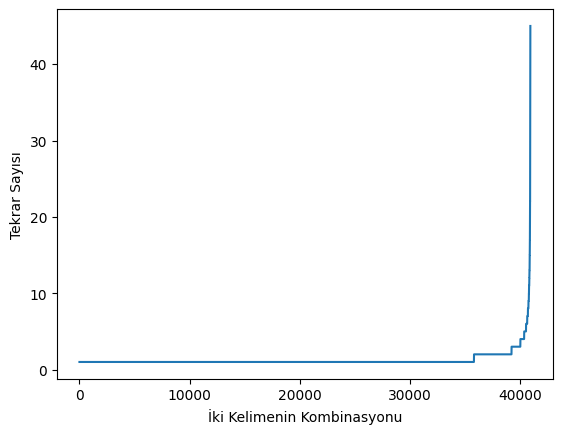

In [63]:
import matplotlib.pyplot as plt
import numpy as np

bigram_freq = Counter(list(nltk.bigrams(text)))

ypoints = np.array(
    np.sort(
        [freq for bigram, freq in bigram_freq.items()]
    )
)

plt.plot(ypoints)
plt.xlabel("İki Kelimenin Kombinasyonu")
plt.ylabel("Tekrar Sayısı")
plt.show()



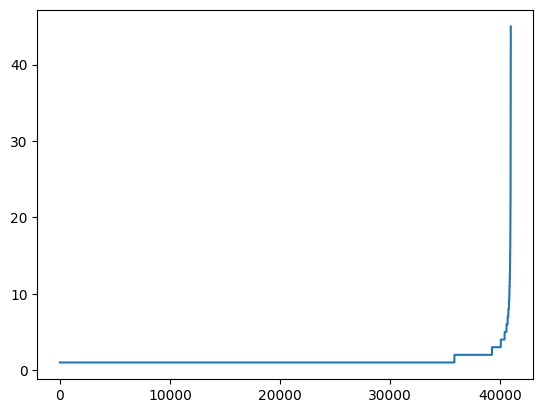

In [64]:
import matplotlib.pyplot as plt
import numpy as np


ypoints = np.array(np.sort(freqs))

plt.plot(ypoints)
plt.show()

In [65]:
bigrams = list(nltk.bigrams(text))

result = {}

for x,y in bigrams:
    if (x in result.keys() ):
        if (y in result[x]):
            pass
        else:
            result[x] = result[x] + [y] 
    else:
        result[x] =  [y] 


    if (y in result.keys() ):
        if (x in result[y]):
            pass
        else:
            result[y] = result[y] + [x] 
    else:
        result[y] =  [x] 

result
 

{'silver': ['loaded',
  'biogenic',
  'nanoparticles',
  'sensor',
  'based',
  'distillatederived',
  'synthesis',
  'aunrs',
  'nanocubes',
  'fabrication',
  'doped',
  'phytofabricated'],
 'loaded': ['silver',
  'functionalized',
  'fe3o4',
  'activated',
  'phytocomplex',
  'zein'],
 'functionalized': ['loaded',
  'calix',
  'onto',
  'magnetic',
  'fe3o4',
  'graphene',
  'calixarene',
  'iron',
  'nmethylglucamine',
  'calix4arene',
  'nanoparticle',
  'acid',
  'selfassembled',
  'sporopollenin',
  'calixareneproline',
  'abilities',
  'biosorbent',
  'pillar5arene',
  'gel',
  '4phenylacetophynone',
  'calix4pyrrole',
  'vicdioxime',
  'oxidesubphthalocyanine',
  'ferrocene',
  'violet',
  'sporopolleninmediated',
  'gold',
  'nanomaterials',
  'polyacrylonitrile',
  'thiophene',
  'polyvinyl',
  'foals',
  'organic'],
 'calix': ['functionalized', '4arene'],
 '4arene': ['calix', 'nanofibers'],
 'nanofibers': ['4arene',
  'evaluation',
  'oxide',
  'educational',
  'cu2znsnse4x

In [71]:
parametre1 = 5

#En fazla kelime ile bağlantısı olan kelimeler n-->5
import pandas 

all_connections = []

for word in result:
    all_connections.append([word,len(result[word]),result[word]])

all_connections = pandas.DataFrame(all_connections)
all_connections.columns = ['target','length','values']

all_connections = all_connections.sort_values('length', ascending=False)

biggest_x_connections = all_connections[:parametre1]
biggest_x_connections.index = range(0,parametre1)
biggest_x_connections

,target,length,values
0,effects,421,"[obesitys, ventricular, adverse, flooding, stu..."
1,using,404,"[microplastics, atrftir, classification, deep,..."
2,effect,402,"[evaluation, indomethacininduced, watermelon, ..."
3,properties,369,"[quality, potential, technological, full, phys..."
4,original,324,"[attitudes, research, catalysis, articlerelati..."


In [72]:
#En fazla ortak kelimesi olan n->10
parametre2 = 10

saves = {}

for lists in biggest_x_connections['values']:
    for word in lists:
        if word in saves.keys():
            saves[word] += 1
        else:
            saves[word] = 1
    
mostCommond50 = pandas.DataFrame(
    saves.items(),
    columns=['target','counted']
).sort_values('counted',ascending=False)[:parametre2]['target'].values

mostCommond50 = list(mostCommond50)
mostCommond50

['turkey',
 'model',
 'techniques',
 'investigation',
 'study',
 'applications',
 'studies',
 'engine',
 'water',
 'systems']

In [73]:
loved_ones = []

bigrams = list(nltk.bigrams(text))  
bigram_freq = Counter(bigrams)

for x,y in bigram_freq:
    if (x in biggest_x_connections.target.values) or (y in biggest_x_connections.target.values):
        if (x in mostCommond50) or (y in mostCommond50):
            loved_ones.append((x,y))
            
top_bigrams = Counter(loved_ones)

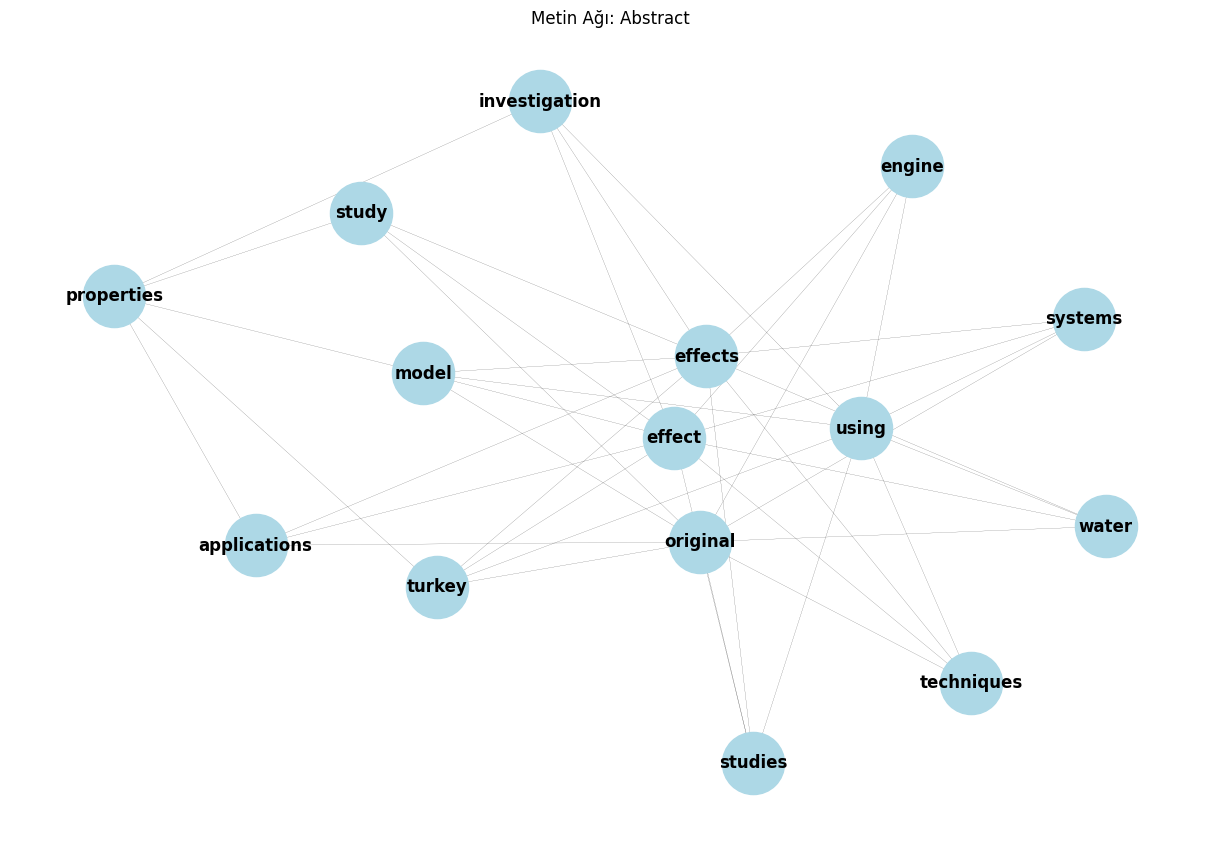

In [74]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for bigram, freq in top_bigrams.items():
    G.add_edge(bigram[0], bigram[1], weight=freq)

plt.figure(figsize=(12, 8))
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]  

pos = nx.spring_layout(G, seed=42)  
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_color='lightblue', 
    font_weight='bold', 
    node_size=2000, 
    width=[0.1 * w for w in weights]  
)

plt.title('Metin Ağı: Abstract')
plt.show()

    

In [75]:
raise ValueError()


import nltk
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for bigram, freq in top_bigrams.items():
    G.add_edge(bigram[0], bigram[1], weight=freq)

plt.figure(figsize=(12, 8))
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]  

pos = nx.spring_layout(G, seed=42)  
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_color='lightblue', 
    font_weight='bold', 
    node_size=2000, 
    width=[0.1 * w for w in weights]  
)

plt.title('Metin Ağı: Title')
plt.show()

    

ValueError: 